In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import pickle


In [30]:
print("Loading dataset...")
df = pd.read_csv("weatherAUS.csv")

Loading dataset...


In [31]:
# Display basic information about the dataset
print("\nDataset Information:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())


Dataset Information:
Shape: (145460, 23)

First 5 rows:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cl

In [32]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      3

In [33]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [34]:
df = df.dropna()

In [35]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [36]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [37]:

# Data Preprocessing
print("\n--- Data Preprocessing ---")

# Create target variabl
# e: RainTomorrow (Yes=1, No=0)
print("Converting target variable to binary...")
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})


--- Data Preprocessing ---
Converting target variable to binary...


In [38]:
df['RainTomorrow'] 

6049      0
6050      0
6052      0
6053      0
6054      0
         ..
142298    0
142299    0
142300    0
142301    0
142302    0
Name: RainTomorrow, Length: 56420, dtype: int64

In [39]:
# Drop Date column and Location column
print("Dropping unnecessary columns (Date and Location)...")
df = df.drop(['Date', 'Location'], axis=1)

Dropping unnecessary columns (Date and Location)...


In [40]:
# Split features and target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [41]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No
142299,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No
142300,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No
142301,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No


In [42]:
y

6049      0
6050      0
6052      0
6053      0
6054      0
         ..
142298    0
142299    0
142300    0
142301    0
142302    0
Name: RainTomorrow, Length: 56420, dtype: int64

In [43]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [44]:
print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")


Numeric features: 16
Categorical features: 4


In [45]:
print("\nSplitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


Splitting data into train and test sets...


In [46]:

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (42315, 20)
Testing set shape: (14105, 20)


In [47]:
# Create preprocessing pipeline
print("\nCreating preprocessing pipeline...")
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



Creating preprocessing pipeline...


In [48]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])




--- Exploratory Data Analysis ---
Creating visualizations for dataset understanding...


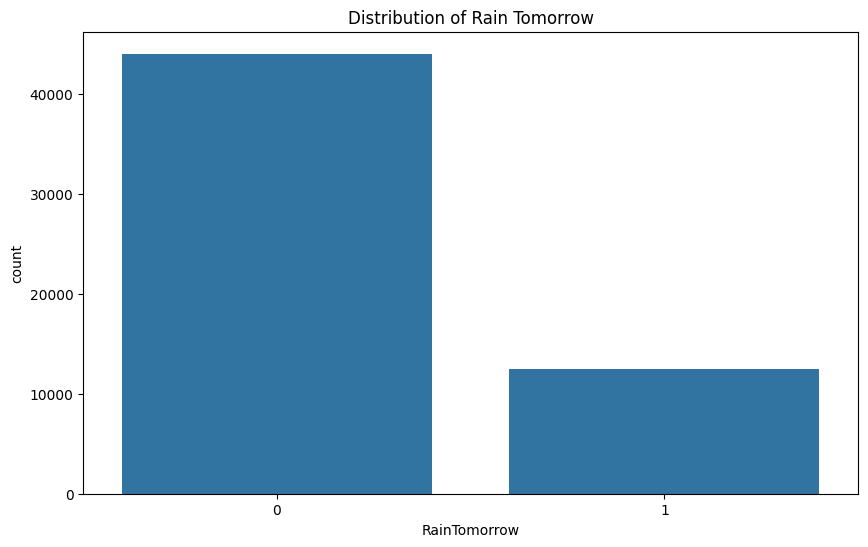

In [ ]:
# EDA (Exploratory Data Analysis)
print("\n--- Exploratory Data Analysis ---")
print("Creating visualizations for dataset understanding...")

# Visualization code
plt.figure(figsize=(10, 6))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of Rain Tomorrow')
plt.savefig('rain_distribution.png')
plt.show()
plt.close()

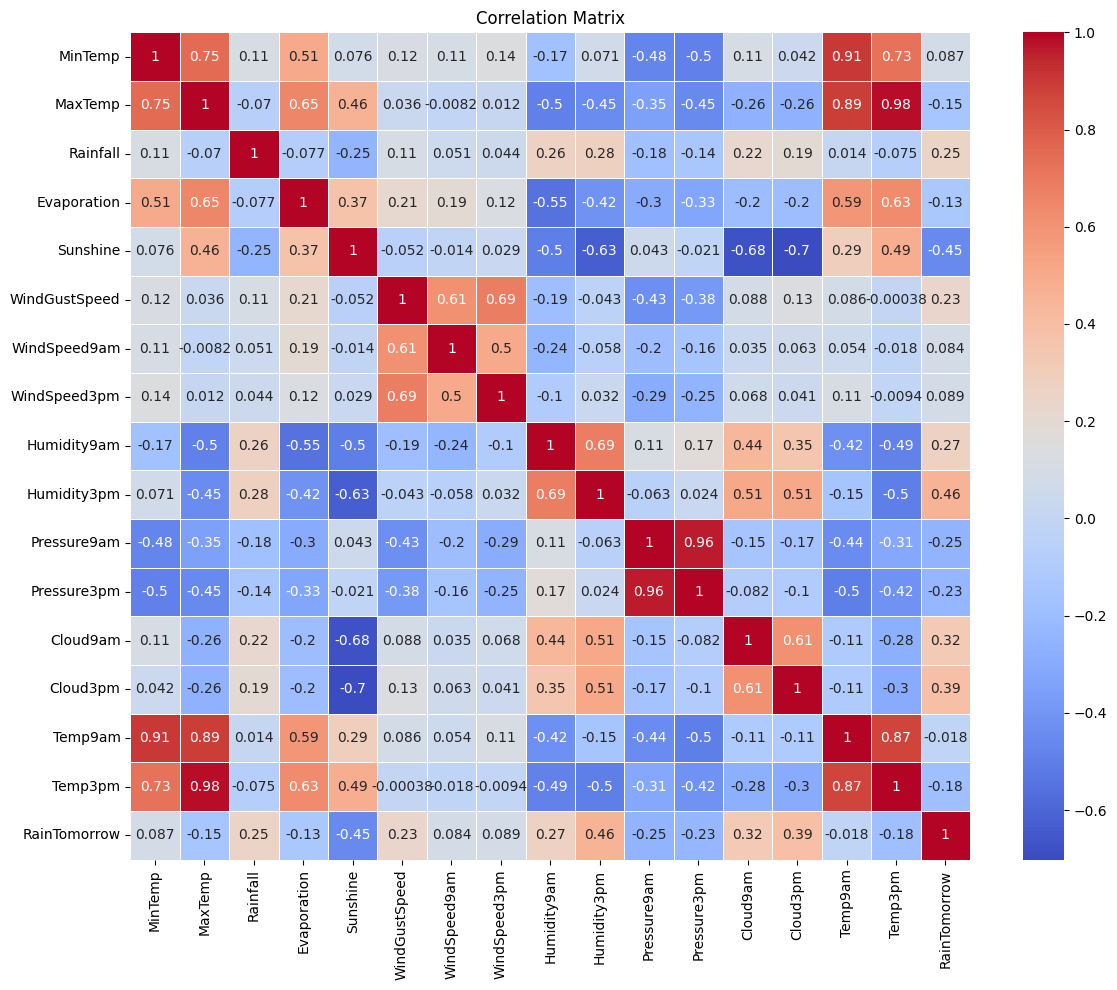

In [54]:
# Correlation matrix for numeric features
plt.figure(figsize=(12, 10))
correlation = df[numeric_features.tolist() + ['RainTomorrow']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()


In [55]:
# Feature Engineering
print("\n--- Feature Engineering ---")
print("Creating new features based on existing data...")

# Adding useful features for rainfall prediction
print("Adding engineered features...")
# Creating humidity difference features
X_train['Humidity_Diff'] = X_train['Humidity9am'] - X_train['Humidity3pm']
X_test['Humidity_Diff'] = X_test['Humidity9am'] - X_test['Humidity3pm']


--- Feature Engineering ---
Creating new features based on existing data...
Adding engineered features...


In [59]:
# Creating temperature difference features
X_train['Temp_Diff'] = X_train['Temp9am'] - X_train['Temp3pm']
X_test['Temp_Diff'] = X_test['Temp9am'] - X_test['Temp3pm']

# Creating pressure difference features
X_train['Pressure_Diff'] = X_train['Pressure9am'] - X_train['Pressure3pm']
X_test['Pressure_Diff'] = X_test['Pressure9am'] - X_test['Pressure3pm']

# Creating wind speed ratio
X_train['WindSpeed_Ratio'] = X_train['WindSpeed9am'] / (X_train['WindSpeed3pm'] + 1)  # Adding 1 to avoid division by zero
X_test['WindSpeed_Ratio'] = X_test['WindSpeed9am'] / (X_test['WindSpeed3pm'] + 1)



In [61]:
#  Models Implementation
print("\n--- Model Implementation ---")
print("Implementing and evaluating 5 machine learning models...")


--- Model Implementation ---
Implementing and evaluating 5 machine learning models...


In [63]:
# Import models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [64]:
# Define models dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}


In [65]:
# Parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1]
    },
    'Support Vector Machine': {
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': ['scale', 'auto']
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5, 7]
    }
}


In [66]:
# Dictionary to store results
results = {}
best_model = None
best_accuracy = 0
best_pipeline = None

In [ ]:
# Loop through each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Create pipeline with preprocessor and classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Grid search for hyperparameter tuning
    grid_search = GridSearchCV(
        pipeline,
        param_grids[model_name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model_cv = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Make predictions
    y_pred = best_model_cv.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calculate ROC AUC
    y_prob = best_model_cv.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'best_params': best_params,
        'classification_report': report,
        'roc_auc': roc_auc,
        'model': best_model_cv
    }
    
    # Print results
    print(f"Best parameters: {best_params}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(report)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(f'confusion_matrix_{model_name.replace(" ", "_")}.png')
    plt.close()
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.savefig(f'roc_curve_{model_name.replace(" ", "_")}.png')
    plt.close()
    
    # Track best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name
        best_pipeline = best_model_cv


Training Logistic Regression...
Best parameters: {'classifier__C': 0.1}
Accuracy: 0.8547
ROC AUC: 0.8888
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10998
           1       0.73      0.55      0.62      3107

    accuracy                           0.85     14105
   macro avg       0.80      0.74      0.77     14105
weighted avg       0.85      0.85      0.85     14105


Training Random Forest...
Best parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Accuracy: 0.8625
ROC AUC: 0.8979
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     10998
           1       0.77      0.53      0.63      3107

    accuracy                           0.86     14105
   macro avg       0.83      0.74      0.77     14105
weighted avg       0.86      0.86      0.85     14105


Training Gradient Boosting...
Best parameters: {'cl